In [1]:
# Fixed Parameters
M = 100
N = 68

L1 = 20
L2 = 12

In [2]:
# Import Library
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
miu = 0.2
A = 1
sigma = 0.1
# Set the center position of the box, plot the image we need for estimation
m0 = 50
n0 = 38
theta = 0.2*np.pi
R_mat = [[np.cos(theta),-1*np.sin(theta)],
         [np.sin(theta),np.cos(theta)]]

Text(0.5,1,'Generated Image Sample')

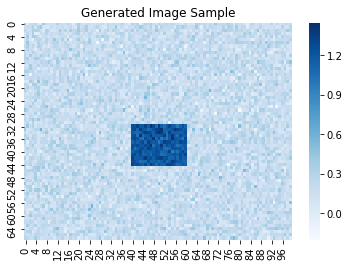

In [4]:
background = sigma * np.random.randn(N,M) + miu
object_a = np.zeros([N,M])

for i in range (N):
    for j in range (M):
        if abs(i-n0)<=(L2/2) and abs(j-m0)<=(L1/2):
            object_a[i][j]= 1
            #background[i][j]=0
image_1 = background+A*object_a
#plt.gray()
sns.heatmap(image_1,cmap="Blues")
plt.title("Generated Image Sample")

#plt.imshow(image_1, cmap="hot")

In [4]:
"""""""""
First, Caculate matrix H (MN*2). 
Second, Caculate the estimated Theta(A and miu) .
Last, Do Grid Search to maximize (X-H*Theta)T(X-H*Theta)

"""""""""
# sum_results_f=[]
# sum_index_f=[]
var_A =[]
var_miu = []
list_SNR = []
for SNR in np.arange(0.1,1,0.1):
    list_m =[]
    list_n =[]
    list_sigma_square=[]
    list_A =[]
    list_miu = []
    for r in range(100):
        sigma = np.sqrt(1/SNR)
        background_f = sigma * np.random.randn(N,M) + miu
        object_f = np.zeros([N,M])

        for i in range (N):
            for j in range (M):
                if abs(i-n0)<=(L2/2) and abs(j-m0)<=(L1/2):
                    object_f[i][j]= 1
                    #background[i][j]=0
        image_1 = background_f+A*object_f
        X_image = np.transpose(np.matrix(image_1).flatten('F'))  
        sum_results_f = []
        sum_index_f = []
        for n0_hat in range(int(L2/2-1),int(N-L2/2)):
            for m0_hat in range(int(L1/2-1),int(M-L1/2)):
                object_sim = np.zeros((N,M))
                for i in range(N):
                    for j in range(M):
                        if abs(i-n0_hat)<=(L2/2) and abs(j-m0_hat)<=(L1/2):
                                object_sim[i,j]= 1        
                g = np.transpose(np.matrix(object_sim).flatten('F'))            
                I = np.transpose(np.matrix(np.ones([M,N])).flatten('F')) 
                H = np.concatenate((g,I), axis=1)
                Theta = np.linalg.inv(np.transpose(H)*H)*np.transpose(H)*X_image
                square_err = np.transpose(X_image - H*Theta)*(X_image - H*Theta)
                sum_results_f.append(square_err)
                sum_index_f.append([n0_hat, m0_hat])

        [n0_est,m0_est] = sum_index_f[np.argmin(sum_results_f)]
#         print("The estimated center position is ", [n0_est,m0_est])
        list_m.append(m0_est)
        list_n.append(n0_est)


        sigma_square_est = min(sum_results_f)/(M*N)
#         print(" The Estimated sigma square is: ", sigma_square_est)
        sigma_est = np.sqrt(sigma_square_est)
        list_sigma_square.append(sigma_square_est)



        object_sim = np.zeros((N,M))
        for i in range(N):
            for j in range(M):
                if abs(i-n0_est)<=(L2/2) and abs(j-m0_est)<=(L1/2):
                        object_sim[i,j]= 1        
        g = np.transpose(np.matrix(object_sim).flatten('F'))            
        I = np.transpose(np.matrix(np.ones([M,N])).flatten('F')) 
        H = np.concatenate((g,I), axis=1)
        Theta_est = np.linalg.inv(np.transpose(H)*H)*np.transpose(H)*X_image
        A_est = Theta_est[0]
        miu_est = Theta_est[1]
        list_A.append(A_est)
        list_miu.append(miu_est)
    var_A.append(np.var(list_A))
    var_miu.append(np.var(list_miu))
    list_SNR.append(SNR)
    print(var_A)
#         print(" The Estimated A is: ", A_est)
#         print(" The Estimated miu is: ", miu_est)

[0.08462146491849314]
[0.08462146491849314, 0.017715818630987493]
[0.08462146491849314, 0.017715818630987493, 0.008933377743834596]
[0.08462146491849314, 0.017715818630987493, 0.008933377743834596, 0.008648098246453035]
[0.08462146491849314, 0.017715818630987493, 0.008933377743834596, 0.008648098246453035, 0.007097690193791107]
[0.08462146491849314, 0.017715818630987493, 0.008933377743834596, 0.008648098246453035, 0.007097690193791107, 0.005932817426554886]
[0.08462146491849314, 0.017715818630987493, 0.008933377743834596, 0.008648098246453035, 0.007097690193791107, 0.005932817426554886, 0.005445564476580936]
[0.08462146491849314, 0.017715818630987493, 0.008933377743834596, 0.008648098246453035, 0.007097690193791107, 0.005932817426554886, 0.005445564476580936, 0.004879191228300477]
[0.08462146491849314, 0.017715818630987493, 0.008933377743834596, 0.008648098246453035, 0.007097690193791107, 0.005932817426554886, 0.005445564476580936, 0.004879191228300477, 0.0037100135636600647]


Text(0,0.5,'$var\\ \\hat{A}$')

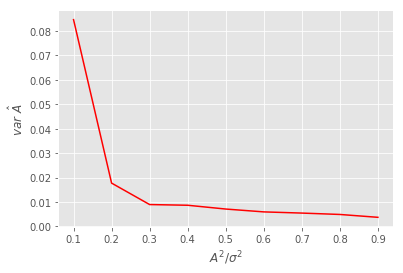

In [21]:
# SNR_range = np.linspace(0.1,10,99)
# A_list = [item.tolist() for item in list_A]
plt.style.use('ggplot')
list_var_A = np.squeeze(var_A)

plt.plot(list_SNR, list_var_A,'r', label='var_A_hat')
plt.xlabel(r'$A^2/\sigma^2$')
plt.ylabel(r'$var\ \hat{A}$')
# plt.plot(list_SNR,list_sigma_square,'b')


Text(0,0.5,'$var\\ \\hat{\\mu}$')

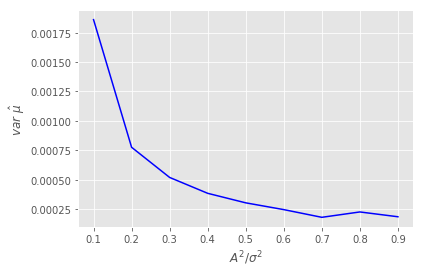

In [20]:
list_var_miu = np.squeeze(var_miu)
plt.plot(list_SNR,list_var_miu,'b',label='var_mu_hat')
plt.xlabel(r'$A^2/\sigma^2$')
plt.ylabel(r'$var\ \hat{\mu}$')

Text(0.5,1,' New Generated Image Sample Using Estimated Parameters')

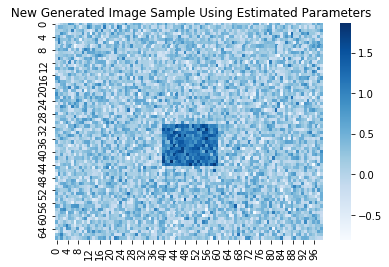

In [7]:
# Fixed Parameters
M = 100
N = 68

L1 = 20
L2 = 12
background_est = np.asscalar(sigma_est) * np.random.randn(N,M) + np.asscalar(miu_est)
object_a_est = np.zeros([N,M])

for i in range (N):
    for j in range (M):
        if abs(i-n0_est)<=(L2/2) and abs(j-m0_est)<=(L1/2):
            object_a_est[i][j]= 1
            #background[i][j]=0
image_1_est = background+np.asscalar(A_est)*object_a_est
#plt.gray()
sns.heatmap(image_1_est,cmap="Blues")
plt.title(" New Generated Image Sample Using Estimated Parameters")